<a href="https://colab.research.google.com/github/marcosilvaa/data_projects/blob/main/Previs%C3%A3o_dos_Pre%C3%A7os_dos_Autom%C3%B3veis_Projeto_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Projeto
Para este projeto de estudo de um algorítimo de Regressão Linear, vamos utilizar um dataset que contém diferentes modelos de carros com diferentes atributos como, tipo de combustível, número de portas, se é um carro aspirado ou um carro turbo, se o carro se trata de um sedan ou um hatchback. 

Iremos abordar ambas as regressões, lineares e múltiplas, com um intuíto final de prever o valor de um carro de um determinado estilo.

O *dataset* a ser utilizado encontra-se [aqui](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/download).

In [415]:
# importando pacotes
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import seaborn as sns

sns.set(style='darkgrid')


In [416]:
# importando dados
df = pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [417]:
# conferindo as features do Dataset
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [418]:
# removendo coluna `car_ID`
df = df.drop('car_ID', axis=1)

Para começarmos nossa exploração, vamos fazer uma regressão linear simples utilizando a potência do veículo e seu consumo (Mpg - Milhas por Galão) para podermos analisar a relação entre eles. 

Como o dataset disponibiliza os dados de consumo na cidade e na estrada, vamos então criar uma nova feature neste dataset chamada `mean_mpg` - *Média de Milhas por galão*. 

In [419]:
# criando nova feature `Média de Milhas por Galão`
df['mean_mpg'] = (df['citympg'] + df['highwaympg']) / 2
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean_mpg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0


Agora que temos os dados referentes à média geral de consumo de combutível, vamos plotar um gráfico de dispersão para podermos conferir a distribuição dos valores e a relação entre os pontos. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


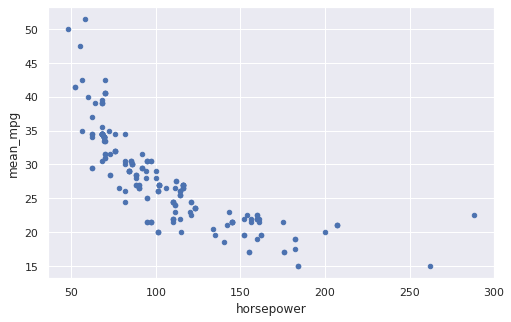

In [420]:
# criando figura do tipo scatter
fig, ax = plt.subplots(figsize = (8,5))
df.plot.scatter(x='horsepower', y='mean_mpg', ax=ax)
plt.show;

In [421]:
# importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Vamos agora separar a nossa variável dependente `mean_mpg` da nossa feature `horsepower`, para então utilizarmos a função `train_test_split` e dividirmos nossos dados entre treino e teste.

In [422]:
# 1. escolhendo e importando o modelo
from sklearn.linear_model import LinearRegression

# 2. instanciando e escolhendo os hiperparametros
model = LinearRegression()

# 3. separando dados de treino e dados de teste
X = df['horsepower'].values.reshape(-1,1)
y = df['mean_mpg']

# 3.1 dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 4. treinando o modelo
model.fit(X_train, y_train);

In [423]:
# conferindo os coeficientes
print('Coeficiente: \t', model.coef_)
print('Intercepto: \t', model.intercept_)

Coeficiente: 	 [-0.13990475]
Intercepto: 	 42.427277477110486


Os coeficientes gerados àcima são utilizados na equação matemática da reta composta por:

$$
Equação da Reta = A X + B 
$$

Sendo:
* A = Coeficiente 
* X = Dados utilizados 
* B = Intercepto

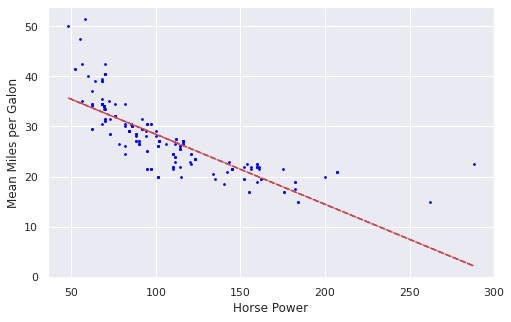

In [424]:
# criando equação da reta
equacao_reta = model.coef_ * X + model.intercept_ 

# plotando reta de regressão 
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(X, y, s=3, color='blue')
ax.set_xlabel("Horse Power")
ax.set_ylabel('Mean Miles per Galon')
ax.plot(X, equacao_reta, '--r', linewidth=1.5);

Podemos concluir através da reta que foi gerada, que à medida que a potência de um veículo aumenta, a tendência é que seu consumo também aumente fazendo com que a média diminua gradativamente.

In [425]:
# 5. Fazendo previsões em cima de novos dados
y_pred = model.predict(X_test)

Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

* ***R-Squared (R2)*** - métrica popularmente usada para calcualr a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1, sendo 1 a melhor pontuação.

* ***Mean Absolute Error (MAE)*** - é a medida absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* ***Mean Squared Error (MSE)*** - é a média dos quadrados dos erros e provavelmente a métrica mais desconhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes. 

In [427]:
# avaliar o desempenho do modelo referente à HorserPower x Mean_MPG
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.6196270792920193
MAE:		 3.0346711253953202
MSE:		 17.541993061322913


### Reutilizando o modelo

Vamos agora utilizar este modelo que acabamos de criar para fazermos uma nova análise. Desta vez vamos comparar a evolução entre o tamanho do motor (`enginesize`) com a sua potência(`horsepower`).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


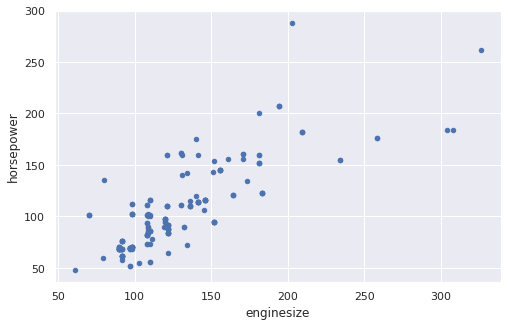

In [428]:
# criando figura do tipo scatter
fig, ax = plt.subplots(figsize = (8,5))
df.plot.scatter(x='enginesize', y='horsepower', ax=ax)
plt.show;

In [430]:
# ENGINE SIZE x HORSEPOWER

# 1. escolhendo e importando o modelo
from sklearn.linear_model import LinearRegression

# 2. instanciando e escolhendo os hiperparametros
model = LinearRegression()

# 3. separando dados de treino e dados de teste
X = df['enginesize'].values.reshape(-1,1)
y = df['horsepower']

# 3.1 dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 4. treinando o modelo
model.fit(X_train, y_train);

In [431]:
# conferindo os coeficientes para ENGINE SIZE x HORSEPOWER
print('Coeficiente: \t', model.coef_)
print('Intercepto: \t', model.intercept_)

Coeficiente: 	 [0.73400406]
Intercepto: 	 11.66604104692459


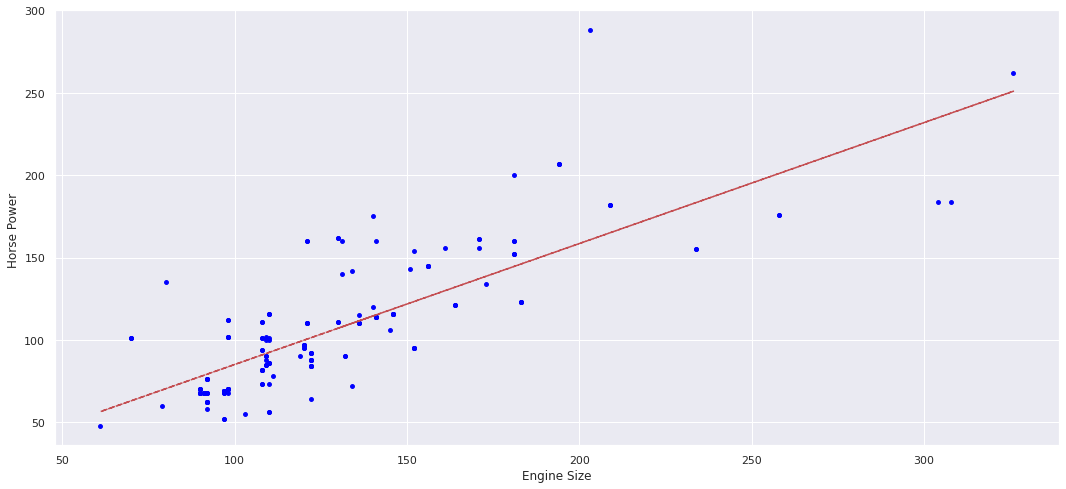

In [432]:
# criando equação da reta
equacao_reta = model.coef_ * X + model.intercept_ 

# plotando reta de regressão ENGINE SIZE x HORSEPOWER
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(X, y, s=15, color='blue')
ax.set_xlabel("Engine Size")
ax.set_ylabel('Horse Power ')
ax.plot(X, equacao_reta, '--r', linewidth=1.5);

In [433]:
# 5. Fazendo previsões em cima de novos dados
y_pred = model.predict(X_test)

In [436]:
# avaliar o desempenho do modelo ENGINE SIZE x HORSEPOWER
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.7627738961159396
MAE:		 14.678982716495874
MSE:		 354.2974493454861


Podemos também analisar a relação entre outras métricas como:

* `EngineSize` X `Mean_mpg`
* `Horsepower` X `carweight`
* `Mean_mpg` X `curbweight`

    

## Regressão Linear Múltipla

Agora que ja vimos a relação entre alguns pares de *features*, vamos então utilizar todas as informações que temos para desenvolver um modelo de regressão linear múltipla, ou seja, que envolve múltipas *features*, sendo assim teremos mais variáveis independentes disponíveis para incrementar nossa análise, e assim conseguirmos chegar à um modelo de previsão de valor de um veículo. 


In [ ]:
# conferindo tipo de dados
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
mean_mpg            float64
dtype: object

### Readequando nosso dataset

O modelo de regressão linear, tanto simples quanto múltipla, é baseada em cálculos estatísticos, sendo assim necessitam apenas de números para funcionar.

Como podemos conferir acima, diversas features encontram-se como tipo `object`, primeiro passo será remover todas estas features, deixando apenas as features do tipo numérico (`int64` ou `float64`).

In [ ]:
df_reduzido = df.select_dtypes(include='number')
df_reduzido.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean_mpg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0


In [ ]:
# 1. importando modelo 
from sklearn.linear_model import LinearRegression

# 2. Escolher os Hiperparametros
model = LinearRegression()

# 3. Separar os dados entre feature matrix & target vector
X = df_reduzido.drop(['price'], axis=1)
y = df_reduzido['price'] 

# dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treino)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_predicted = model.predict(X_test)

In [ ]:
# imprimindo os coeficientes
print("Coeficiente:\t", model.coef_)
print("")
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [ 2.71190564e+02  2.09965630e+02 -1.34653857e+02  9.65713510e+02
  7.33494693e+01  2.38052855e+00  1.05616661e+02 -7.84265793e+02
 -2.48013426e+03  2.03740173e+02  9.56672194e+00  2.33096414e+00
 -1.58758383e+02  9.86801204e+01 -3.00391313e+01]

Intercepto:	 -74151.4454094287


In [ ]:
# verificando o desempenho do modelo
print("R2 Score:\t", r2_score(y_test,y_predicted))
print("MAE:\t\t", mean_absolute_error(y_test,y_predicted))
print("MSE:\t\t", mean_squared_error(y_test, y_predicted))

R2 Score:	 0.7503991581617881
MAE:		 2709.7197359507704
MSE:		 18206555.1251072


Vamos agora reutilizar nosso modelo, porém agora para conferir e relacionar o resultado com o modelo de regressão simples realizado anteriormente. Vamos utilizar `horsepower` como a nossa variável alvo.

---



In [ ]:
# 1. importando modelo 
from sklearn.linear_model import LinearRegression

# 2. Escolher os Hiperparametros
model = LinearRegression()

# 3. Separar os dados entre feature matrix & target vector
X = df_reduzido.drop(['horsepower'], axis=1)
y = df_reduzido['horsepower'] 

# dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treino)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_predicted = model.predict(X_test)

# imprimindo os coeficientes
print("Coeficiente:\t", model.coef_)
print("")
print("Intercepto:\t", model.intercept_)
print("")

# verificando o desempenho do modelo
print("R2 Score:\t", r2_score(y_test,y_predicted))
print("MAE:\t\t", mean_absolute_error(y_test,y_predicted))
print("MSE:\t\t", mean_squared_error(y_test, y_predicted))

Coeficiente:	 [ 8.30983977e-01 -1.24910292e+00  5.97840806e-02  6.90605683e-01
 -6.60662207e-01  1.48093175e-02  4.64400719e-01  1.97351489e+01
 -2.99500852e+00 -1.79081403e-01  1.85833777e-02 -1.50183484e+00
  8.09296831e-01  4.15252052e-04 -3.46269002e-01]

Intercepto:	 -24.312397244241225

R2 Score:	 0.7872737845042714
MAE:		 13.339475767268697
MSE:		 414.6772660116597


## Comparando Resultados

* Regressão Linear Simples - ENGINE SIZE x HORSEPOWER 
  * R2 Score:	 0.7627738961159396
  * MAE:		 14.678982716495874
  * MSE:		 354.2974493454861


* Regressão Linear Múltipla
  * R2 Score:	 0.7872737845042714
  * MAE:		 13.339475767268697
  * MSE:		 414.6772660116597